In [11]:
devtools::document()
devtools::install()
library(ggplot2)
library(dplyr)

Updating iop documentation


Writing NAMESPACE


Loading iop


Writing NAMESPACE
✔  checking for file ‘/home/jovyan/d/ml/iop/DESCRIPTION’ (862ms)
─  preparing ‘iop’: (1.1s)
✔  checking DESCRIPTION meta-information ...
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘iop_0.0.0.9000.tar.gz’
   
Running /opt/conda/lib/R/bin/R CMD INSTALL \
  /tmp/Rtmpe7KOOS/iop_0.0.0.9000.tar.gz --install-tests 
* installing to library ‘/opt/conda/lib/R/library’
* installing *source* package ‘iop’ ...
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded
* DONE (iop)


Reloading attached iop


In [8]:
data = readRDS("../ieee-fraud-detection/train_transaction.rds")
dict = iop::data2dict(file="../ieee-fraud-detection/dict.csv")
##data = predict(dict, data)
dim(data)

[1] 590540    394

In [48]:
id_y = iop::dict2y(dict, data)
time = data[["TransactionDT"]]
ymd = as.POSIXct(as.Date(as.POSIXct(time, origin = "2019-01-01")))
ymx = (format(ymd, format="%Y-%m"))
data[[id_y]] = as.factor(as.character(data[[id_y]]))

table(ymx, data[[id_y]])
ym = unique(ymx)

## subsetting
## [ i-1 ] [  i  ] [ i+1 ]
##         [calib]
## [-------train---------]
## [----learn----] [eval ]
i = 5
.ym = ym[i]
y = data[[id_y]]
i0 = which(ymx == ym[i] & y == 0)
i1 = which(ymx <= ym[i] & y == 1)
id_calib = c(i0, i1)
CALIB = data[id_calib,]
dim(CALIB)

length(i0)
length(i1)

## calibrating
.na2rm = iop::na2rm(CALIB)
CALIB = predict(.na2rm, CALIB)
.const2rm = iop::const2rm(CALIB)
CALIB = predict(.const2rm, CALIB)
id_xnum = iop::dict2xnum(dict, CALIB)
.nzv2rm = iop::nzv2rm(CALIB[,id_xnum])
CALIB = predict(.nzv2rm, CALIB)
id_xnum = iop::dict2xnum(dict, CALIB)
.cor2rm = iop::cor2rm(CALIB[,id_xnum])
CALIB = predict(.cor2rm, CALIB)
id_xnum = iop::dict2xnum(dict, CALIB)
.num2scale = iop::num2scale(CALIB[,id_xnum])
dim(CALIB)


         
ymx            0      1
  2019-01 130938   3401
  2019-02  80764   3301
  2019-03  90302   3868
  2019-04  94178   3849
  2019-05  84481   3031
  2019-06  83962   2972
  2019-07   5252    241

[1] 101931    394

[1] 84481

[1] 17450

[1] 101931     95

[1] 23.95784

[1] 2.196931

[1] -0.02879066

[1] 1.805372

[1] 2.198245

V107           V117             D1           V120           V288 
    -23.254965       1.559232       1.829335       2.081137       2.385452 
          V304           V282           V289           V303           V284 
      2.792865       3.199838       3.435359       4.372981       4.451736 
          V119             C9            V95            V98            V97 
      5.101731       5.376086       5.377982       5.399536       5.704278 
            C5           V115           V287            V96           V286 
      5.883759       6.071348       6.090347       6.332922       6.672293 
          V122           V283           V100 TransactionAmt           V124 
      6.749828       6.817896       7.081419       7.114589       7.121449 
          V101           V312           V103            V99            C13 
      7.611872       7.922272       8.255774       8.351706       8.398682 
          V281           V116           V102           V131           V109 
      8.530368       8.618351       9.144961       9.233388       9.277923 
          V314           V315           V125           V297           V104 
      9.819866       9.862791       9.971815      10.054624      10.129926 
          V301           V300           V285           V114           V313 
     10.216702      10.344051      10.500029      10.782655      11.147529 
          V121           V279           V110           V123           V118 
     11.243060      11.353443      11.665609      11.974417      12.598912 
          V108           V309           V105           V299            C14 
     13.270230      16.028175      16.498636      16.651300      17.111336 
          V298           V293           V106           V112           V296 
     17.145585      17.156583      17.338761      18.295861      18.471451 
          V129           V113           V310           V290           V307 
     18.673717      19.651239      22.050828      27.873299      28.654643 
          V318           V130           V311           V317            C12 
     29.388476      31.080058      32.067875      32.565724      32.728210 
          V295           V133           V308           V134           V127 
     34.087835      40.386959      51.831268      69.006373      74.872945 
          V316           V306           V128           V137           V132 
     88.121129      95.901698     105.297418     106.248162     116.461722 
          V321           V305 
    121.032452     319.253818

[1] 2.198245

[1] "V310"

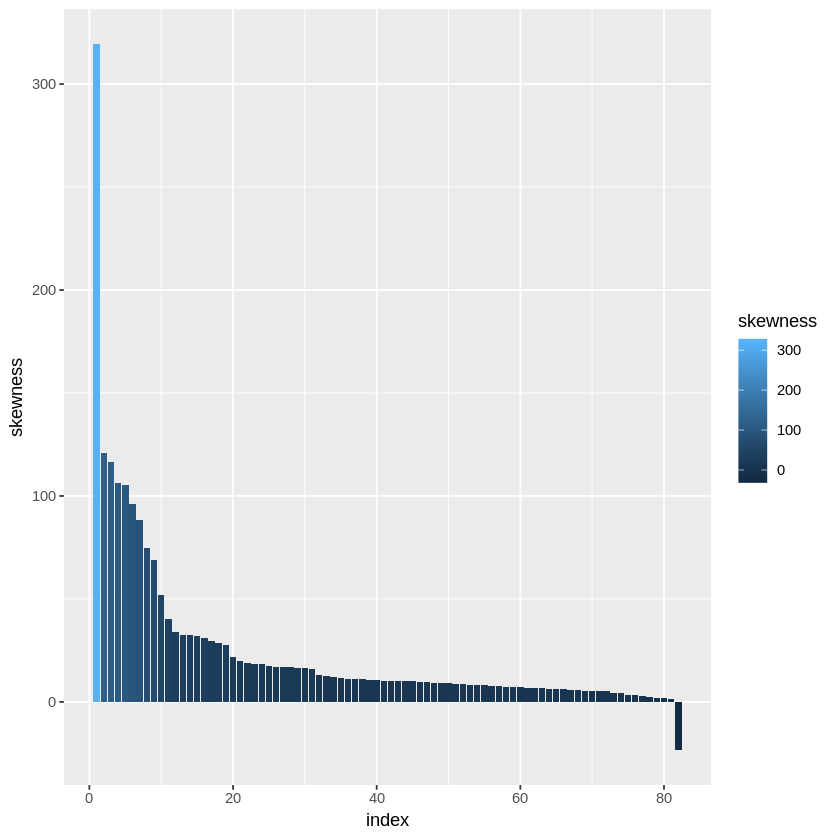

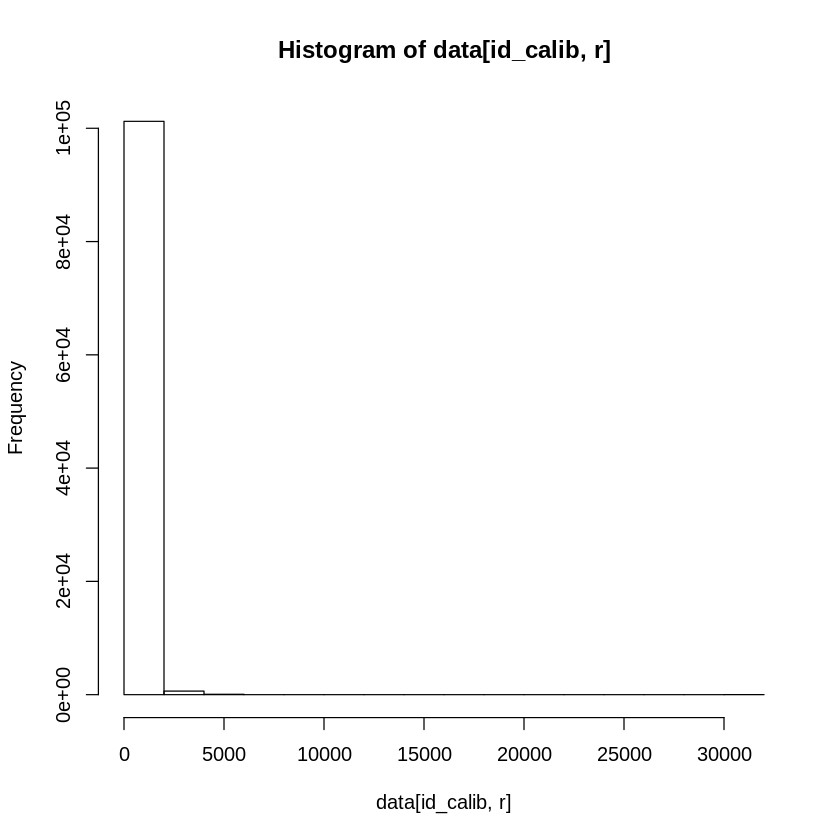

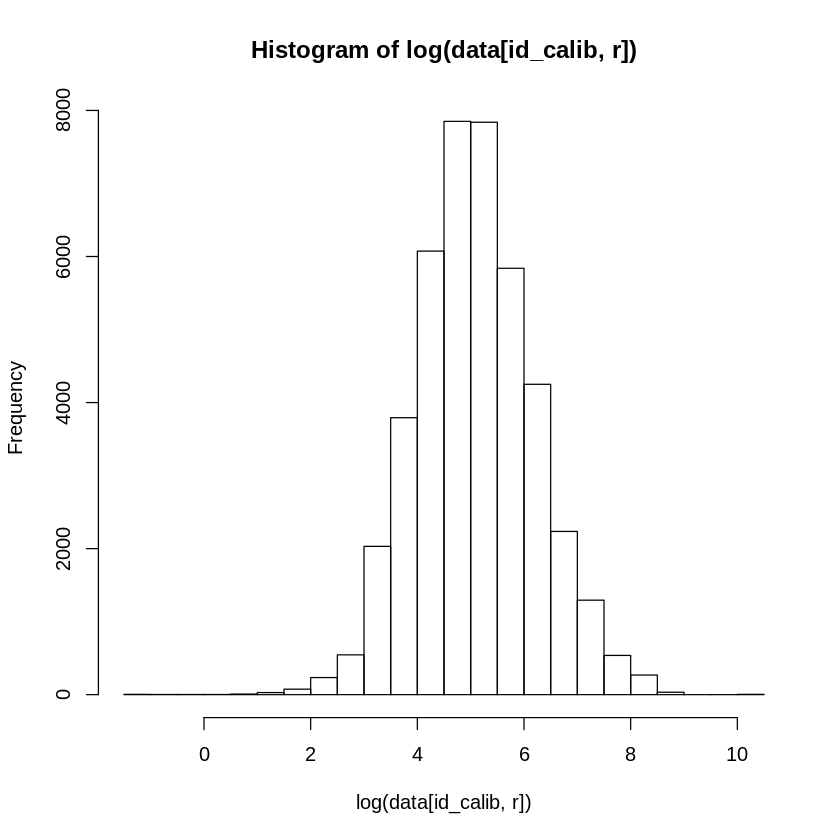

In [89]:
e1071::skewness(data$C1)
e1071::skewness(log(data$C1+.001))
e1071::skewness(runif(1000))
e1071::skewness(data$D1, na.rm=T)
e1071::kurtosis(data$D1, na.rm=T)
s = sapply(id_xnum, function(i)e1071::skewness(data[id_calib,i],na.rm = T))
data.frame(xnum=names(s), skewness=s) %>%
arrange(desc(skewness)) %>%
mutate(index=1:n()) %>%
ggplot(aes(index,skewness, fill=skewness)) + geom_bar(stat="identity")
           sort(s)
           e1071::kurtosis(data$D1, na.rm=T) 

           r = sample(id_xnum,1)
           r
        
hist(data[id_calib, r])
           hist(log(data[id_calib, r]))

[1] "C1"   "C2"   "C4"   "C6"   "C7"   "C8"   "C10"  "C11"  "V111" "V126"
[11] "V135" "V136" "V280" "V291" "V292" "V294" "V302" "V319" "V320"

[1] "isFraud"

[1] "TransactionAmt" "C1"             "C2"             "C4"            
  [5] "C5"             "C6"             "C7"             "C8"            
  [9] "C9"             "C10"            "C11"            "C12"           
 [13] "C13"            "C14"            "D1"             "V95"           
 [17] "V96"            "V97"            "V98"            "V99"           
 [21] "V100"           "V101"           "V102"           "V103"          
 [25] "V104"           "V105"           "V106"           "V107"          
 [29] "V108"           "V109"           "V110"           "V111"          
 [33] "V112"           "V113"           "V114"           "V115"          
 [37] "V116"           "V117"           "V118"           "V119"          
 [41] "V120"           "V121"           "V122"           "V123"          
 [45] "V124"           "V125"           "V126"           "V127"          
 [49] "V128"           "V129"           "V130"           "V131"          
 [53] "V132"           "V133"           "V134"           "V135"          
 [57] "V136"           "V137"           "V279"           "V280"          
 [61] "V281"           "V282"           "V283"           "V284"          
 [65] "V285"           "V286"           "V287"           "V288"          
 [69] "V289"           "V290"           "V291"           "V292"          
 [73] "V293"           "V294"           "V295"           "V296"          
 [77] "V297"           "V298"           "V299"           "V300"          
 [81] "V301"           "V302"           "V303"           "V304"          
 [85] "V305"           "V306"           "V307"           "V308"          
 [89] "V309"           "V310"           "V311"           "V312"          
 [93] "V313"           "V314"           "V315"           "V316"          
 [97] "V317"           "V318"           "V319"           "V320"          
[101] "V321"

TransactionAmt             C1             C2             C4             C5 
   0.000000000    0.000000000    0.991525093    0.956808801    0.183358102 
            C6             C7             C8             C9            C10 
   0.975386453    0.887435275    0.953997361    0.190729481    0.940950410 
           C11            C12            C13            C14             D1 
   0.993919711    0.890292343    0.726515188    0.934719337    0.001609383 
           V95            V96            V97            V98            V99 
   0.028217467   -0.003165562    0.006829566   -0.003574340   -0.009275345

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 8130 rows containing non-finite values (stat_bin).”

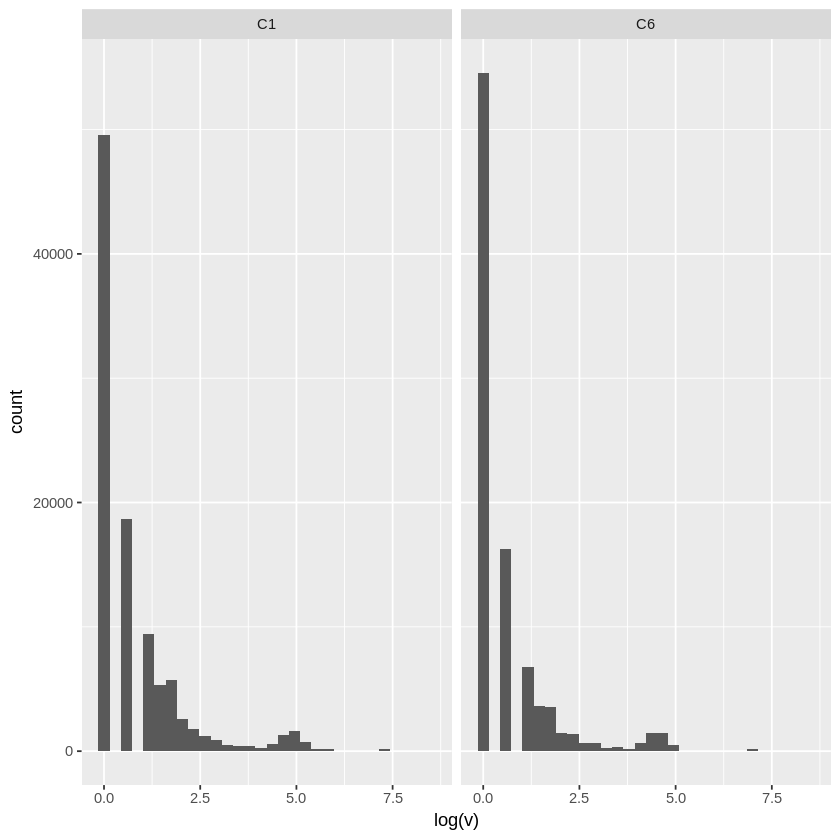

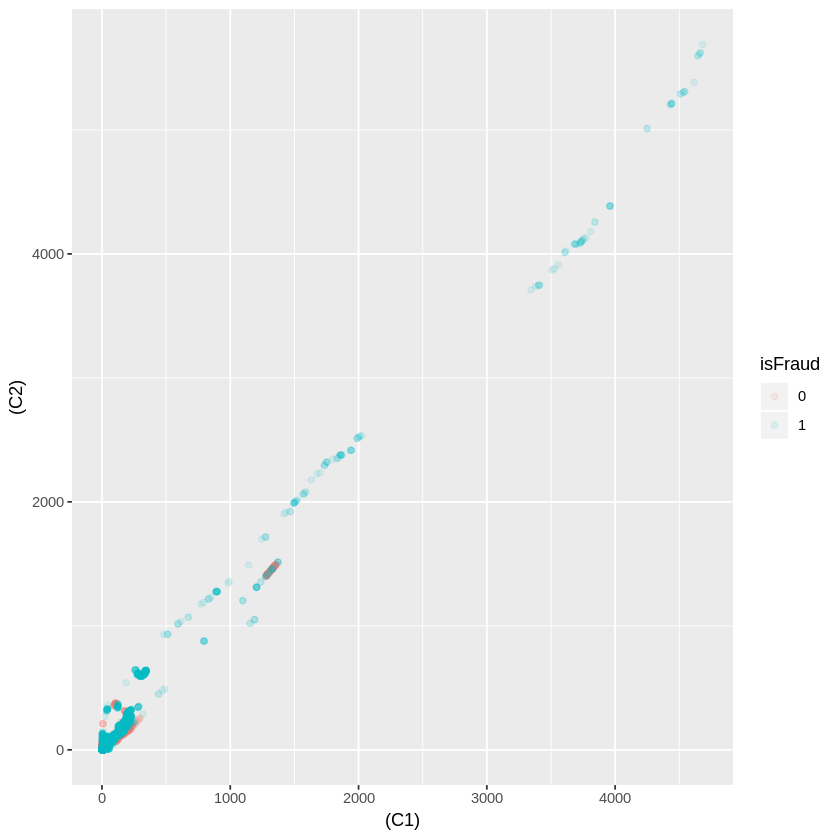

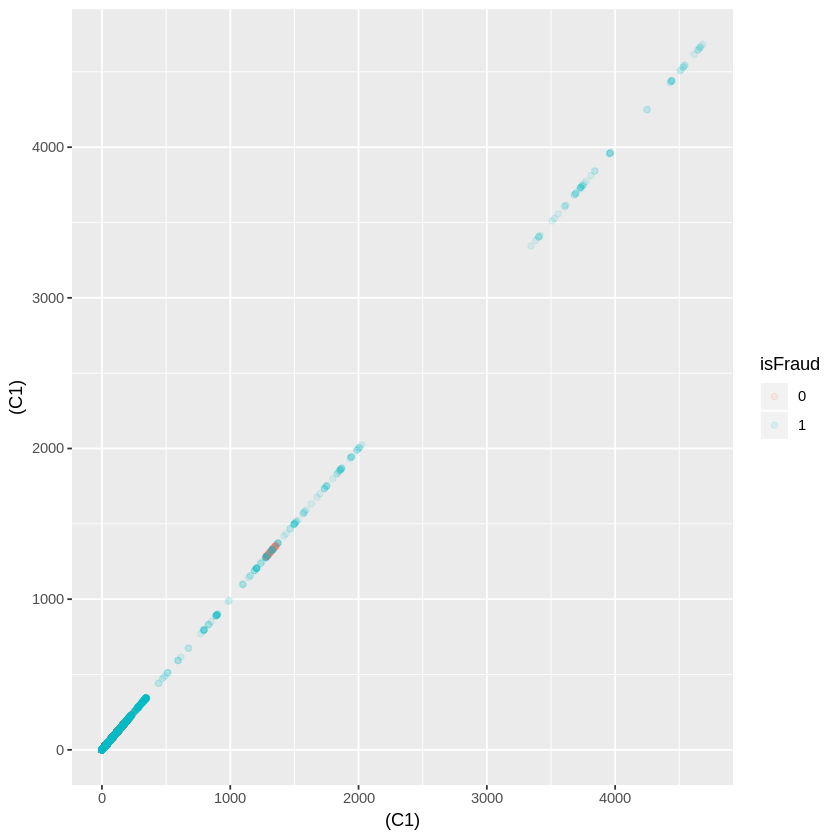

Warning message:
“Using size for a discrete variable is not advised.”

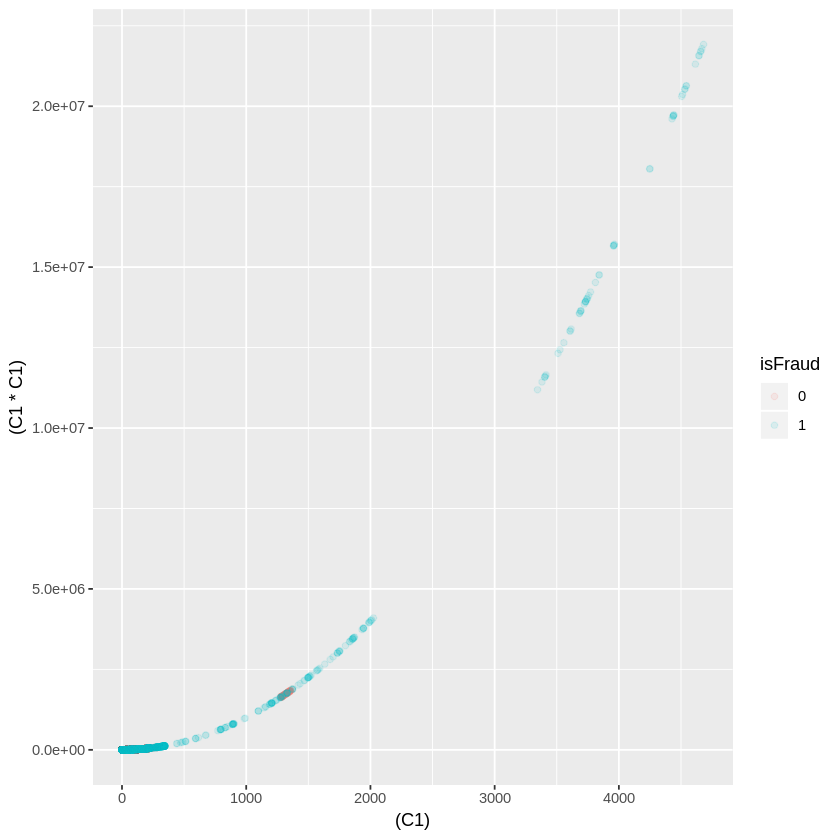

,row,col
C2,3,2
C4,4,2
C6,6,2
C8,8,2
C11,11,2
C4,4,3
C6,6,3
C8,8,3
C11,11,3
C6,6,4


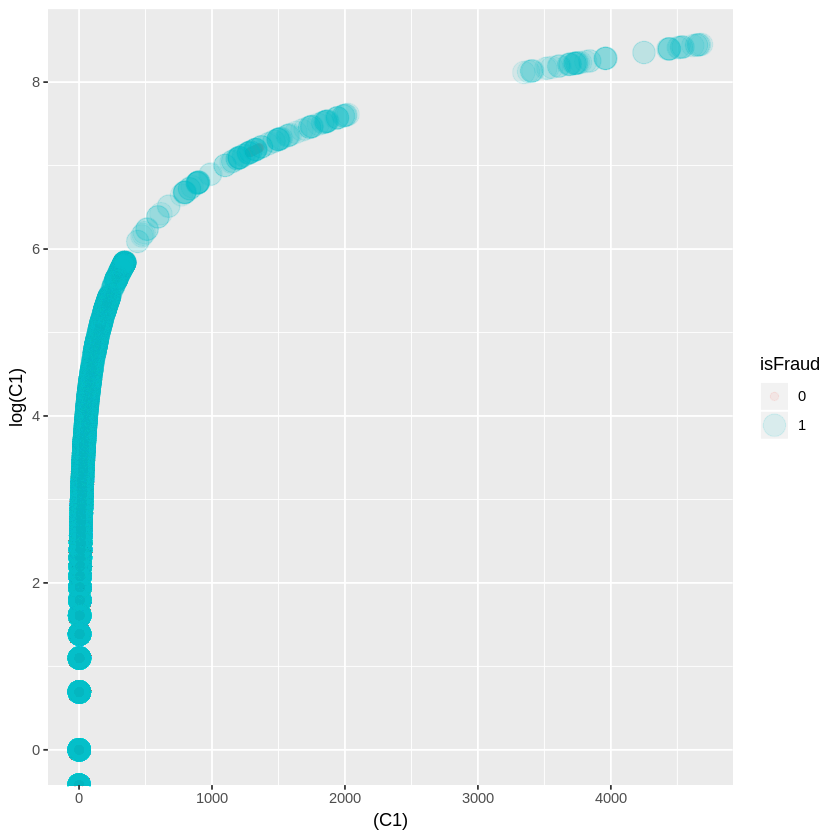

In [90]:
    .cor2rm$lut
id_y
colnames(.cor2rm$cormat)
.cor2rm$cormat[1:20,2]
data[id_calib,] %>%
select(C1, C6) %>%
tidyr::gather(k,v) %>%
ggplot(aes(log(v))) + geom_histogram() + facet_grid(.~k)

data[id_calib,] %>%
select(C1, C2, isFraud) %>%
ggplot(aes((C1), (C2))) + geom_point(aes(color=isFraud), alpha=.1)

data[id_calib,] %>%
select(C1,  isFraud) %>%
ggplot(aes((C1), (C1))) + geom_point(aes(color=isFraud), alpha=.1)

data[id_calib,] %>%
select(C1,  isFraud) %>%
ggplot(aes((C1), (C1*C1))) + geom_point(aes(color=isFraud), alpha=.1)


data[id_calib,] %>%
select(C1,  isFraud) %>%
{ggplot(.,aes((C1), log(C1))) + geom_point(aes(color=isFraud,size=isFraud), alpha=.1)

}

which(.cor2rm$cormat > .cor2rm$thresh, arr.ind = T)

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:dplyr’:

    first, last


Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend

Warning message in cor(x, y, use = use, method = method):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y, use = use, method = method):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y, use = use, method = method):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning message in cor(x, y, use = use, method = method):
“the standard deviation is zero”Warning message in cor(x, y):
“the standard deviation is zero”Warning

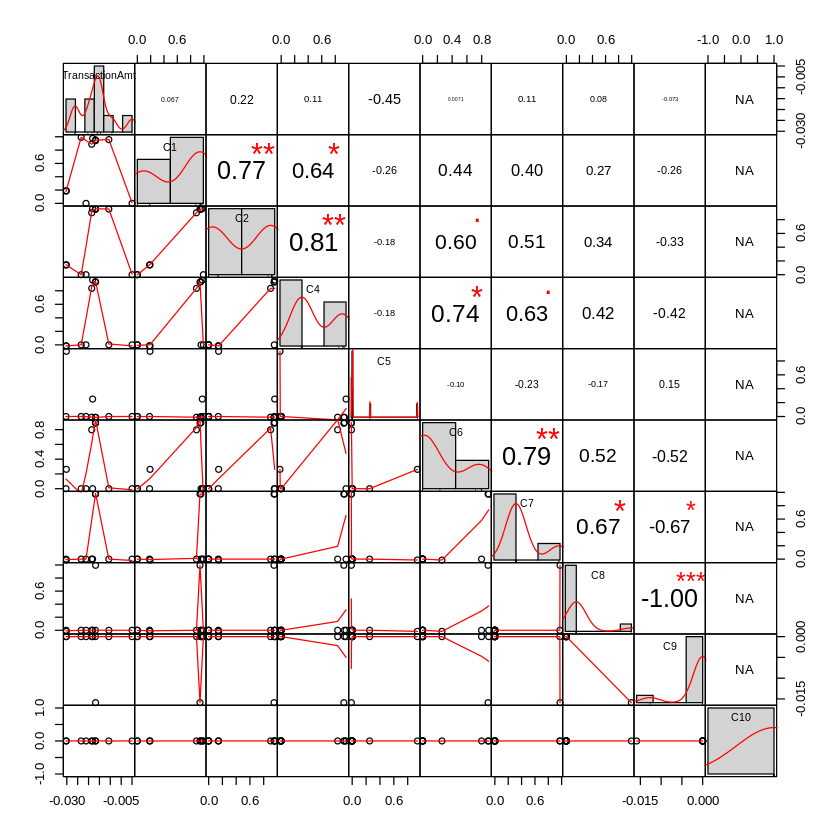

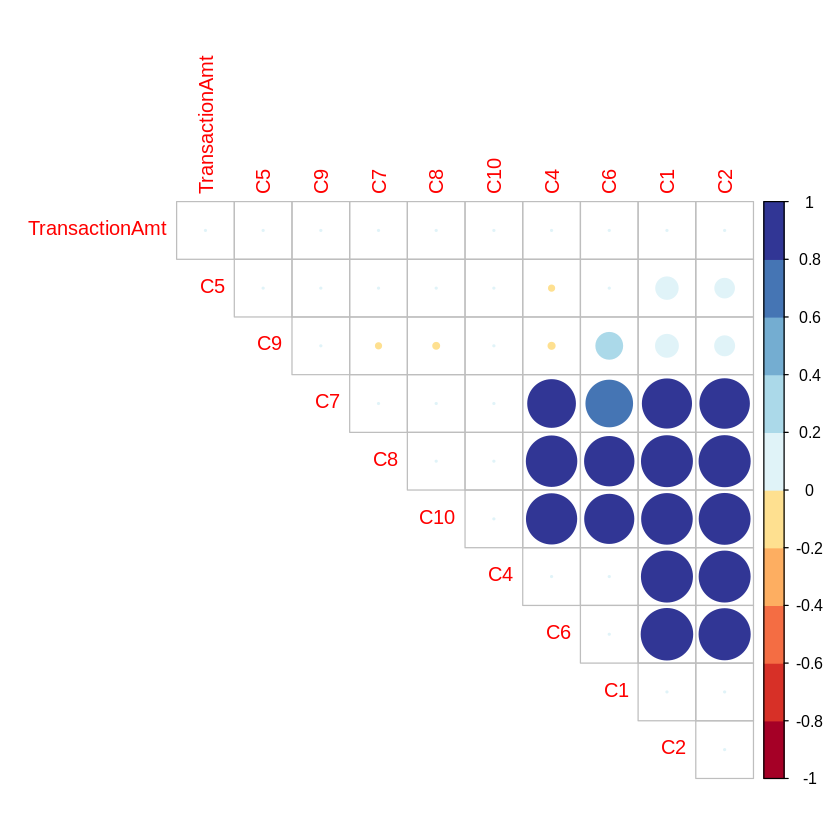

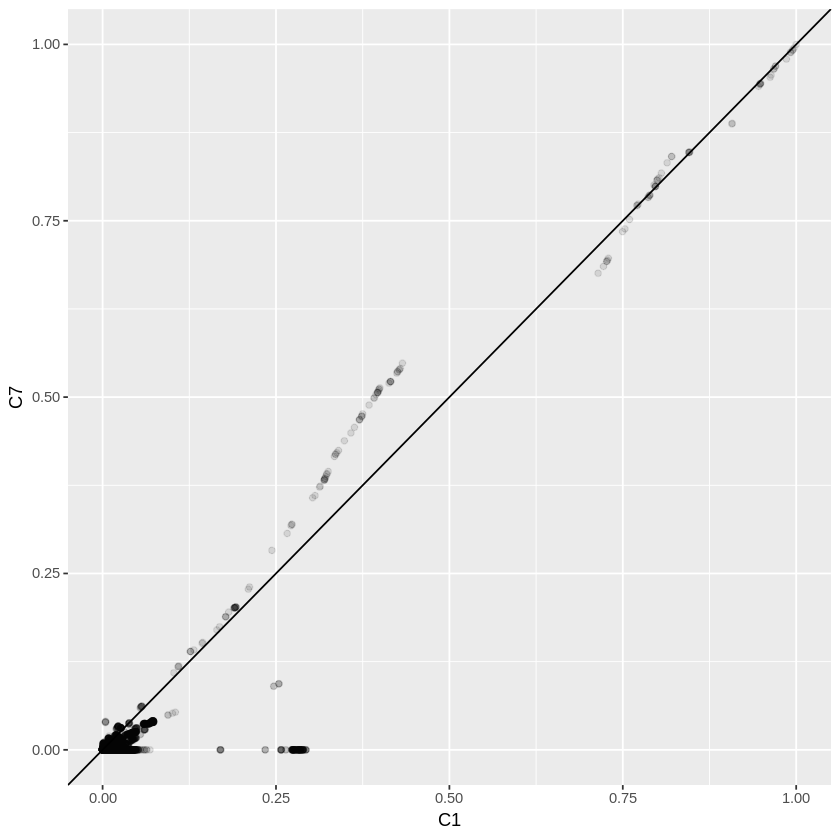

In [116]:
library("PerformanceAnalytics")
chart.Correlation(.cor2rm$cormat[1:10,1:10], histogram=TRUE, pch=19)

library(corrplot)
library(RColorBrewer)
corrplot::corrplot(.cor2rm$cormat[1:10,1:10], type="upper", order="hclust",
         col=brewer.pal(n=10, name="RdYlBu"))

df = data[id_calib,] %>%
mutate(C1=(C1-min(C1))/diff(range(C1))) %>%
mutate(C7=(C7-min(C7))/diff(range(C7))) 

f = lm(C1 ~ C7, data=df)
ggplot(df, aes(C1,C7)) + geom_point(alpha=.1) + geom_abline(slope=1)

Warning message:
“Removed 2 rows containing missing values (geom_point).”

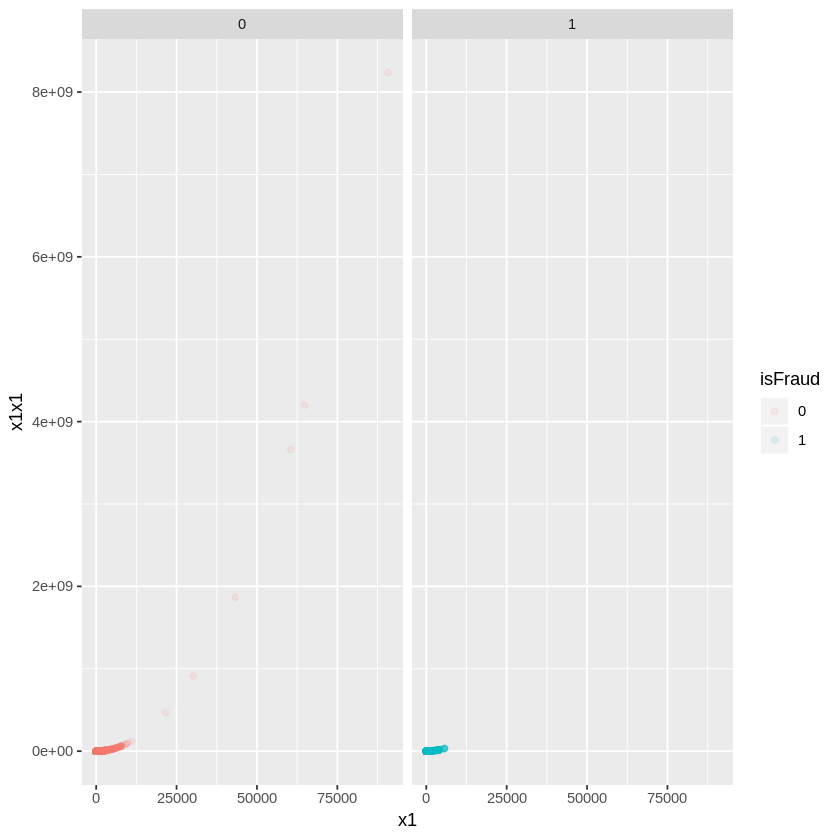

In [129]:
data[id_calib,] %>%
mutate(x1=V320, x1x1=x1*x1) %>%
ggplot(aes(x1, x1x1, color=isFraud)) + geom_jitter(alpha=.1) + facet_grid(.~isFraud)

In [133]:
x = data[id_calib, id_xnum]
labs = id_xnum
comb = combn(labs,m=2)
combs = 1:ncol(comb)
xdot = list()
xdot[combs] = lapply(combs, function(i){
    a = comb[1,i]
    b = comb[2,i]
    x[[a]] * x[[b]]
})
df = as.data.frame(xdot)

In [ ]:
df$isFraud = data[id_calib,id_y]
rf=randomForest::randomForest(isFraud ~., data=df, ntree=10)
colnames(df)[rf$importance > 5]

In [ ]:
id_y = iop::dict2y(dict, data)
time = data[["TransactionDT"]]
ymd = as.POSIXct(as.Date(as.POSIXct(time, origin = "1970-01-01")))
ymx = (format(ymd, format="%Y-%m"))
data[[id_y]] = as.factor(as.character(data[[id_y]]))

table(ymx, data[[id_y]])
ym = unique(ymx)

## subsetting
## [ i-1 ] [  i  ] [ i+1 ]
##         [calib]
## [-------train---------]
## [----learn----] [eval ]
i = 5
.ym = ym[i]
y = data[[id_y]]
i0 = which(ymx == ym[i] & y == 0)
i1 = which(ymx <= ym[i] & y == 1)
id_calib = c(i0, i1)
CALIB = data[id_calib,]
dim(CALIB)

length(i0)
length(i1)

## calibrating
.na2rm = iop::na2rm(CALIB)
CALIB = predict(.na2rm, CALIB)
.const2rm = iop::const2rm(CALIB)
CALIB = predict(.const2rm, CALIB)
id_xnum = iop::dict2xnum(dict, CALIB)
.nzv2rm = iop::nzv2rm(CALIB[,id_xnum])
CALIB = predict(.nzv2rm, CALIB)
id_xnum = iop::dict2xnum(dict, CALIB)
.cor2rm = iop::cor2rm(CALIB[,id_xnum])
CALIB = predict(.cor2rm, CALIB)
id_xnum = iop::dict2xnum(dict, CALIB)
.num2norm = iop::num2norm(CALIB[,id_xnum])
dim(CALIB)






## undersampling:
## (a) RUS = random undersampling
scale = 10
n1 = length(i1)
n0 = as.integer(scale * n1)
id_rus = c(sample(i0, n0), i1)
RUS = data[id_rus,]
RUS = predict(.num2norm, RUS)
## RUS NB
f = iop::data2formula(dict, CALIB)
rus.nb = e1071::naiveBayes(f, data=RUS)
## RUS DT
loss = matrix(c(0, 1, 5, 0), ncol=2, byrow=T)
f = iop::data2formula(dict, CALIB, varx="xnum")
rus.dt = rpart::rpart(f, data=RUS, parms=list(loss=loss, split="information"))
## RUS SVM
id_xnum = iop::dict2xnum(dict, CALIB)
rus.svm = LiblineaR::LiblineaR(data=RUS[,id_xnum], target=RUS[[id_y]])





In [ ]:
c(i0,i1)

In [ ]:
##
## NBTree
##
## - Decision tree-based paritioning of the data (unbalanced)
## - No interaction data (needed)
## - Data subsets at each leaf node is a Naive Bayes Classifer
## - Prediction:
##     if DT == 0 -> 0
##     if NB == 1 -> 1
##     else       -> 0
##

    i = 5
    .ym = ym[i]
    y = data[[id_y]]
    i0 = which(ymx == ym[i] & y == 0)
    i1 = which(ymx <= ym[i] & y == 1)
    id_learn = c(i0, i1)
    LEARN = data[id_learn,]
    f = iop::data2formula(dict, CALIB, varx="xnum")
    loss = matrix(c(0, 1, 5, 0), ncol=2, byrow=T)
    library(partykit)
    dt = rpart::rpart(f, data=LEARN, parms=list(loss=loss, split="information"))

    nb = fastNaiveBayes::fastNaiveBayes(x=LEARN[,id_xnum], y=LEARN[[id_y]])## comparison

    fit = fitted(as.party(dt))
    id_node = fit[,1]
    nodes = unique(id_node)
    id_xnum = iop::dict2xnum(dict, CALIB)
    NBTree = list()
    tt = table(LEARN[[id_y]])
    priors = as.numeric(tt/sum(tt))
    tmp = lapply(nodes, function(node){
        sel = id_node == node
        x = data[sel,id_xnum]
        x[is.na(x)] = 0
        y = data[[id_y]][sel]
        NBTree[[node]] <<- fastNaiveBayes::fastNaiveBayes(x=x, y=y, priors=priors)
    })


In [ ]:
y = data[[id_y]]
i0 = which(ymx == ym[i+1] & y == 0)
i1 = which(ymx <= ym[i+1] & y == 1)
n0 = length(i1)
id_eval = c(sample(i0, n0), i1)
#id_eval = c(i0,i1)
EVAL = data[id_eval,]
dim(EVAL)

library(fastNaiveBayes)
p_node = predict(as.party(dt), newdata=EVAL[,id_xnum], type="node")
p_nb = rep(NA,length(p_node))
p_nb = list()
p_nb[nodes] = lapply(nodes, function(node){
    p = predict(NBTree[[node]], newdata=EVAL[,id_xnum], type="class")
    p
})

p_dt = as.character(predict(dt, newdata=EVAL[,id_xnum], type="class"))

p_nb. = as.character(predict(nb, newdata=EVAL[,id_xnum], type="class"))

p_nbtree = as.character(sapply(1:length(p_node), function(i){
    p_nb[[p_node[i]]][i]
}))
a = as.character(EVAL[[id_y]])
table(p_dt, a)

table(p_nb., a)

table(p_dt, p_nbtree, a)
p = ifelse(p_dt == 0, p_dt, ifelse(p_nbtree == 1, p_nbtree, 0))
table(p,a)

    conf = as.matrix(table(p,a))
    TP = conf[2,2]
    FP = conf[2,1]
    FN = conf[1,2]
    PPV = TP / (TP+FP)
    REC = TP / (TP+FN)
    F1 = PPV*REC*2/(REC+PPV)
PPV
REC
F1


In [ ]:
dim(EVAL)
xx = num2interaction(EVAL[,id_xnum])
p.svm = predict(svm, newx=xx)$predictions

In [ ]:
## SVM
##
## - Linear model with interaction (terms)
## 

    i = 5
    .ym = ym[i]
    y = data[[id_y]]
    i0 = which(ymx == ym[i] & y == 0)
    i1 = which(ymx <= ym[i] & y == 1)
    n0 = length(i1)
    id_learn = c(sample(i0, n0), i1)
    ##id_learn = c(i0, i1)
    id_xnum = iop::dict2xnum(dict, CALIB)
    LEARN = data[id_learn,]
    sel = complete.cases(LEARN[,id_xnum])
    LEARN = LEARN[sel,]
    num2int = num2interaction(LEARN[,id_xnum])
    svm = LiblineaR::LiblineaR(data=num2int,target=LEARN[[id_y]])


In [ ]:
    y = data[[id_y]]
    i0 = which(ymx == ym[i+1] & y == 0)
    i1 = which(ymx <= ym[i+1] & y == 1)
    n0 = length(i1)
    #id_eval = c(sample(i0, n0), i1)
    id_eval = c(i0,i1)
    EVAL = data[id_eval,]
    sel = complete.cases(EVAL[,id_xnum])
    EVAL = EVAL[sel,]
    xx = num2interaction(EVAL[,id_xnum])
    dim(EVAL)
    #p = predict(svm, newx=EVAL[,id_xnum])
    svm.p = predict(svm, newx=xx)$predictions


library(fastNaiveBayes)
p_node = predict(as.party(dt), newdata=EVAL[,id_xnum], type="node")
p_nb = rep(NA,length(p_node))
p_nb = list()
p_nb[nodes] = lapply(nodes, function(node){
    p = predict(NBTree[[node]], newdata=EVAL[,id_xnum], type="class")
    p
})

p_dt = as.character(predict(dt, newdata=EVAL[,id_xnum], type="class"))
p_nbtree = as.character(sapply(1:length(p_node), function(i){
    p_nb[[p_node[i]]][i]
}))
dt.p = ifelse(p_dt == 0, p_dt, ifelse(p_nbtree == 1, p_nbtree, 0))



In [ ]:
    i = 5
    .ym = ym[i]
    y = data[[id_y]]
    i0 = which(ymx == ym[i] & y == 0)
    i1 = which(ymx <= ym[i] & y == 1)
    n0 = length(i1)
    id_learn = c(sample(i0, n0), i1)
    ##id_learn = c(i0, i1)
    id_xnum = iop::dict2xnum(dict, CALIB)
    LEARN = data[id_learn,]
    sel = complete.cases(LEARN[,id_xnum])
    LEARN = LEARN[sel,]
    num2int = num2interaction(LEARN[,id_xnum])
    ##LEARNX = LEARN[,id_xnum]
    LEARNX = num2int
    LEARNY = LEARN[[id_y]]

fit <- function(vars, x, y){
    i0 = which(y == 0)
    i1 = which(y == 1)
    r0 = sample(i0, as.integer(length(i0)/2))
    r1 = sample(i1, as.integer(length(i1)/2))
    id_learn = c(r0, r1)
    id_eval = -c(r0, r1)
    svm = LiblineaR::LiblineaR(data=x[id_learn,vars],target=y[id_learn])
    p = predict(svm, newx=x[id_eval,vars])$predictions
    a = y[id_eval]
    conf = as.matrix(table(p,a))
    TP = conf[2,2]
    FP = conf[2,1]
    FN = conf[1,2]
    PPV = TP / (TP+FP)
    REC = TP / (TP+FN)
    F1 = PPV*REC*2/(REC+PPV)
    F1
    F1 / sum(vars)
}

run = 10
ga = GA::ga(fitness=function(vars){ fit(vars=vars, x=LEARNX, y=LEARNY) },
      type="binary",
      elitism=3,
      pmutation=.5,
      popSize=10,
      nBits=ncol(LEARNX),
      names=colnames(LEARNX),
      run=run,
      maxiter=10,
      monitor=plot,
      keepBest=T,
      parallel=F,
      seed=84211)

sel = which(as.integer(ga@bestSol[[run]]) == 1)
colnames(LEARNX)[sel]am

In [ ]:
num2interaction <- function(x, ...){
    labs = colnames(x)
    comb = combn(labs,m=2)
    combs = 1:ncol(comb)
    newx = list()
    newx[combs] = lapply(combs, function(i){
        a = comb[1,i]
        b = comb[2,i]
        x[[a]] * x[[b]]
    })

    name = sapply(combs, function(i){
        a = comb[1,i]
        b = comb[2,i]
        paste0(a,"_x_",b)
    })
    return(as.data.frame(newx, col.names=name))
}

In [ ]:
num2interactionT <- function(x, t, ...){
    labs = colnames(x)
    newx = list()
    newx[labs] = lapply(labs, function(i){
        t * x[[i]]
    })
    name = paste0("t_x_",labs)
    return(as.data.frame(newx, col.names=name))
}

In [ ]:
?LiblineaR::LiblineaR

In [ ]:
## (b) DTS
dts.nb.p = sapply(1:length(dts.nb), function(i){
    nb = dts.nb[[i]]
    predict(nb, newdata=EVAL, type="class")
})
p = apply(dts.nb.p,1, function(x){ ifelse(sum(as.integer(x))  >  length(x)/2, 1, 0) })
table(p, a=EVAL[[id_y]])

In [ ]:
id_xnum = iop::dict2xnum(dict, CALIB)
.num2norm = iop::num2norm(CALIB[,id_xnum])

In [ ]:
sel = complete.cases(RUS[,id_xnum])
dat = predict(.num2norm, RUS[sel,id_xnum])
tar = as.character(RUS[sel,id_y])

svm = LiblineaR::LiblineaR(data=dat[,1:7], target = tar)
p = predict(svm, newx=(EVAL[,id_xnum]))

In [ ]:
table(p$predictions, a=EVAL[[id_y]])
dim(EVAL)

In [ ]:
id_train = which(ym[i-1] <= ymx & ymx <= ym[i+1])
TRAIN = data[id_train,]
dim(TRAIN)


id_xnum = iop::dict2xnum(dict, CALIB)
id_group = "card1"
sel = c(id_group, id_xnum)
dt = data.table::as.data.table(TRAIN[,sel])
dt[is.na(dt[["card1"]]), "card1"] = "NA"

id_xnum

width = 30
lag = as.integer(width/2)
system.time({
dt = dt[,  do.call(cbind,lapply(.SD, function(x){
    m = zoo::rollapplyr(x, width, mean, fill=NA)
    s = zoo::rollapplyr(x, width, sd, fill=NA)
    z = (x-m)/s
    mi = zoo::rollapplyr(x, width, min, fill=NA)
    ma = zoo::rollapplyr(x, width, max, fill=NA)
    n = (x-mi)/(ma-mi)
    a = zoo::rollapplyr(x, width, cumsum, fill=NA)
    b = data.table::shift(a, lag)
    ndi = (a-b)/(a+b)###---not working yet
    data.frame(xnum=x, z=z,n=n)
})),by=id_group]
})
dim(dt)


In [ ]:
width = 30
a = by(df,
  INDICES=list(df[["card1"]]),
  FUN=function(g){
      if(nrow(g) == 1){
          g[,id_xnum] = 0
      }else{
          tmp = as.data.frame(lapply(g[,id_xnum], function(x){
              m = zoo::rollapplyr(x, width, mean, fill=NA)
              s = zoo::rollapplyr(x, width, sd, fill=NA)
              z = (x-m)/s
              n = cumsum(x)
              r = lag(n, 5)
              ndi = (n-r)/(n+r)
              mi = zoo::rollapplyr(x, width, min, fill=NA)
              ma = zoo::rollapplyr(x, width, max, fill=NA)
              mima = (x-mi)/(ma-mi)
              #data.frame(z, ndi, mima)
              z
          }))
          tmp
      }
  })
tt = do.call(rbind, a)
dim(tt)
head(tt, 100)


o = order(table(df[["card1"]]))[1:4]
dt=df[o,c("card1",id_xnum[1:2])]
dt[["card1"]] = paste0("_",dt[["card1"]])
by(dt,
   INDICES=list(dt[["card1"]]),
   FUN=function(x){
       data.frame(x)
   })
dt
is.na(head(data[["card1"]]))

In [ ]:
shif

In [ ]:
data.table::shift(1:10,5)

In [ ]:
##
## calibration phase
##
calib = data[id_learn[,1],]
dim(calib)
id_xnum = iop::dict2xnum(dict, data)
.na2rm = iop::na2rm(calib)
.const2rm = iop::const2rm(calib)
.nzv2rm = iop::nzv2rm(calib[, id_xnum])
id_y = iop::dict2y(dict, data)
id_xcat = iop::dict2xcat(dict, data)
.cat2num = iop::cat2num(calib[,id_xcat], calib[[id_y]])
train = data[id_train,]
train = predict(.na2rm, train)
train = predict(.const2rm, train)
train = predict(.nzv2rm, train)
train = predict(.cat2num, train)
id_x = iop::dict2x(dict, train)
.cor2rm = iop::cor2rm(train[,id_x])
train = predict(.cor2rm, train)
dim(train)
#.num2norm = iop::num2norm(train[,id_xnum])
#train = predict(.cor2num, train)
learn = train[id_learn[,2],]
eval = data[id_eval,]
eval = predict(.na2rm, eval)
eval = predict(.const2rm, eval)
eval = predict(.nzv2rm, eval)
eval = predict(.cat2num, eval)
eval = predict(.cor2rm, eval)
dim(eval)

In [ ]:
##
## learning phase
##
f = iop::data2formula(dict, learn)
learn[[id_y]] = as.factor(as.character(learn[[id_y]]))
nb = e1071::naiveBayes(f, data=learn)

In [ ]:
p = predict(nb, newdata=eval, type="class")
a = eval[[id_y]]
t = ymx[id_eval]
table(p,a,t)

In [ ]:
f = iop::data2formula(dict, train, "xnum")
train[[id_y]] = as.factor(as.character(train[[id_y]]))
svm = e1071::svm(f, data=train)

In [ ]:
p = predict(svm, newdata=eval, type="class")
a = eval[[id_y]]
t = ymx[id_eval]
table(p,a,t)

In [ ]:
str(dt)

In [ ]:
predict(dt, iris)

In [ ]:
th1 = 1.5
th2 = 2.5
xk = t(iris[100, 1:4])
zs = sapply(1:length(M), function(i){
    m = M[[i]]
    s = S[[i]]
    k = K[[i]]
    sd = ifelse(k==1,1,sqrt(s/(k-1)))
    z = mean((xk-m)/sd)
    abs(z)
})

## find the lowest z score
## if the score is below theta1
## then update that centroid
## else if score is > theta2
## then add new centroid
## else????
if(zs[i] < th1){
    m = M[[i]]
    mo = m
    s = S[[i]]
    k = K[[i]]
    m = m + (xk - m)/k
    s = s + (xk - m)*(xk - mo)
    M[[i]] <- m
    S[[i]] <- s
    K[[i]] <- k+1
}

In [ ]:
S

In [ ]:

if(zs[i] < th1){
    m = M[[i]]
    mo = m
    s = S[[i]]
    k = K[[i]]
    m = m + (xk - m)/k
    s = s + (xk - m)*(xk - mo)
    M[[i]] <- m
    S[[i]] <- s
    K[[i]] <- k+1
}else if(zs[i] > th2){
    j = length(M)
    M[[j+1]] <- xk
    S[[j+1]] <- 0
    K[[j+1]] <- 1
}


In [ ]:
##
## NBTree
##
## - Decision tree-based paritioning of the data (unbalanced)
## - No interaction data (needed)
## - Data subsets at each leaf node is a Naive Bayes Classifer
## - Prediction:
##     if DT == 0 -> 0
##     if NB == 1 -> 1
##     else       -> 0
##

    i = 2
    .ym = ym[i]
    y = data[[id_y]]
    i0 = which(ymx == ym[i] & y == 0)
    i1 = which(ymx >= ym[i] & y == 1)
    id_learn = c(i0, i1)
    LEARN = data[id_learn,]
    f = iop::data2formula(dict, CALIB, varx="xnum")
    loss = matrix(c(0, 1, 5, 0), ncol=2, byrow=T)
    library(partykit)
    dt = rpart::rpart(f, data=LEARN, parms=list(loss=loss, split="information"))

    nb = fastNaiveBayes::fastNaiveBayes(x=LEARN[,id_xnum], y=LEARN[[id_y]])## comparison

    fit = fitted(as.party(dt))
    id_node = fit[,1]
    nodes = unique(id_node)
    id_xnum = iop::dict2xnum(dict, CALIB)
    NBTree = list()
    tt = table(LEARN[[id_y]])
    priors = as.numeric(tt/sum(tt))
    tmp = lapply(nodes, function(node){
        sel = id_node == node
        x = data[sel,id_xnum]
        x[is.na(x)] = 0
        y = data[[id_y]][sel]
        NBTree[[node]] <<- fastNaiveBayes::fastNaiveBayes(x=x, y=y, priors=priors)
    })


In [ ]:
y = data[[id_y]]
i0 = which(ymx == ym[i+1] & y == 0)
i1 = which(ymx >= ym[i+1] & y == 1)
n0 = length(i1)
id_eval = c(sample(i0, n0), i1)
#id_eval = c(i0,i1)
EVAL = data[id_eval,]
dim(EVAL)

library(fastNaiveBayes)
p_node = predict(as.party(dt), newdata=EVAL[,id_xnum], type="node")
p_nb = rep(NA,length(p_node))
p_nb = list()
p_nb[nodes] = lapply(nodes, function(node){
    p = predict(NBTree[[node]], newdata=EVAL[,id_xnum], type="class")
    p
})

p_dt = as.character(predict(dt, newdata=EVAL[,id_xnum], type="class"))

p_nb. = as.character(predict(nb, newdata=EVAL[,id_xnum], type="class"))

p_nbtree = as.character(sapply(1:length(p_node), function(i){
    p_nb[[p_node[i]]][i]
}))
a = as.character(EVAL[[id_y]])
table(p_dt, a)

table(p_nb., a)

table(p_dt, p_nbtree, a)
p = ifelse(p_dt == 0, p_dt, ifelse(p_nbtree == 1, p_nbtree, 0))
table(p,a)

    conf = as.matrix(table(p,a))
    TP = conf[2,2]
    FP = conf[2,1]
    FN = conf[1,2]
    PPV = TP / (TP+FP)
    REC = TP / (TP+FN)
    F1 = PPV*REC*2/(REC+PPV)
PPV
REC
F1


In [ ]:
   a
p       0     1
  0 15763  7148
  1  4654 13243

0.739956417276639
0.649453190132902
0.691757208524864

In [ ]:
## SVM
##
## - Linear model with interaction (terms)
## 

    i = 5
    .ym = ym[i]
    y = data[[id_y]]
    i0 = which(ymx == ym[i] & y == 0)
    i1 = which(ymx <= ym[i] & y == 1)
    n0 = length(i1)
    id_learn = c(sample(i0, n0), i1)
    ##id_learn = c(i0, i1)
    id_xnum = iop::dict2xnum(dict, CALIB)
    LEARN = data[id_learn,]
    sel = complete.cases(LEARN[,id_xnum])
    LEARN = LEARN[sel,]
    num2int = num2interaction(LEARN[,id_xnum])
    svm = LiblineaR::LiblineaR(data=num2int,target=LEARN[[id_y]])

    y = data[[id_y]]
    i0 = which(ymx == ym[i+1] & y == 0)
    i1 = which(ymx == ym[i+1] & y == 1)
    n0 = length(i1)
    #id_eval = c(sample(i0, n0), i1)
    id_eval = c(i0,i1)
    EVAL = data[id_eval,]
    sel = complete.cases(EVAL[,id_xnum])
    EVAL = EVAL[sel,]
    xx = num2interaction(EVAL[,id_xnum])
    dim(EVAL)
    #p = predict(svm, newx=EVAL[,id_xnum])
    p = predict(svm, newx=xx)$predictions
    a = EVAL[[id_y]]
    table(p,a)

    conf = as.matrix(table(p,a))
    TP = conf[2,2]
    FP = conf[2,1]
    FN = conf[1,2]
    PPV = TP / (TP+FP)
    REC = TP / (TP+FN)
    F1 = PPV*REC*2/(REC+PPV)
PPV
REC
F1


In [ ]:
## false test
## >=3

84063 394 

   a
p       0     1
  0 60127   996
  1 20635  2305

0.100479511769834
0.698273250530142
0.175679280515224


## true test
## <= 5
   a
p       0     1
  0 66430  1067
  1 17463  1899

0.0980787108769755
0.640256237356709
0.170100322465066

In [ ]:
     40778 394 

   a
p       0     1
  0 15135  6005
  1  5275 14363

0.731388125063652
0.705174783974863
0.718042293655952